<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/02_Generalization_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Generalization Error</h1> 
</strong>

---


### **Generalization Error**

- In supervised learning, you make the assumption that there's a mapping f between features and labels. You can express this as $y=f(x)$. $f$ which is an unknown function that you want to determine. In reality, data generation is always accompanied with randomness or noise like the blue points shown here.

### **Goals of Supervised Learning**

- Our goal is to find a model that best approximates $f$. When training fhat, you want to make sure that noise is discarded as much as possible. At the end,  our goal isachieve a **low predictive error on unseen datasets**.


### **Difficulties in Approximating $f$**

- we may encounter two difficulties when approximating $f$. 
    - The first is **overfitting**, it's when fhat fits the noise in the training set. 
    - The second is __underfitting__, it's when fhat is not flexible enough to approximate $f$.

#### __Overfitting__

- When a model overfits the training set, its predictive power on unseen datasets is pretty low. The model memorized the noise present in the training set. Such model achieves a 
    - low training set error 
    -  and a high test set error.

#### __Underfitting__

- The training set error is roughly equal to the test set error. However, both errors are relatively high. Now the trained model isn't flexible enough to capture the complex dependency between features and labels. 
    - >*In analogy, it's like teaching calculus to a 3-year old. The child does not have the required mental abstraction level that enables him to understand calculus*.


The generalization error of a model tells how much the model  is  generalizes on unseen data. 
- It can be decomposed into 3 terms:
    - _Bias_ 
    - _Variance_ and 
    - _Irreducible error_ (where the irreducible error is the error contribution of noise.)



1. **Bias**

    The bias term tells you, on average, how much fhat and f are different. To illustrate this consider the high bias model shown here in black; this model is not flexible enough to approximate the true function f shown in red. High bias models lead to underfitting.

2. **Variance**

    The variance term tells you how much fhat is inconsistent over different training sets. Consider the high variance model shown here in black; in this case, fhat follows the training data points so closely that it misses the true function f shown in red. High variance models lead to overfitting.

3. **Model Complexity**

    The complexity of a model sets its flexibility to approximate the true function f. For example: increasing the maximum-tree-depth increases the complexity of a decision tree.


# **Bias-Variance Tradeoff**
<p align='center'>
  <a href="#">
    <img src='https://lh3.googleusercontent.com/proxy/xFOESKxrP-Cwyy8emTSS8ToRrvUQRDF6A-nlS2wbC9tUz0k0Z6aSZ_FGGBbVjw8T_ZHXCxMtTQPLIS9ceyitFah2Ap0CYzBMq6m8YAywEoGVZbdPAdqAnzeKYweq'>
  </a>
</p>


>The diagram here shows how the best model complexity corresponds to the lowest generalization error. When the model complexity increases, the variance increases while the bias decreases. Conversely, when model complexity decreases, variance decreases and bias increases.**Our goal is to find the model complexity that achieves the lowest generalization error.** 

Since this error is the sum of three terms with the irreducible error being constant, $$GenZ_{error}= {bais^2}+{Variance}+Irreducible_{error}$$ we need to find a **balance between bias and variance** because as one increases the other decreases. This is known as the **bias-variance trade-off**.



__Bias-Variance Tradeoff: A Visual Explanation__
<p align='center'>
  <a href="#">
    <img src='https://www.kdnuggets.com/wp-content/uploads/bias-and-variance.jpg'>
  </a>
</p>


**As the complexity of increases $\Rightarrow$ The bias term decreases $\Rightarrow$  while the variance term increases.**



<p align='center'>
  <a href="#">
    <img src='https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/Over_under_fit.png?raw=true'>
  </a>
</p>

>  Model $B$ suffers from high bias and underfits the training set & is not able to capture the nonlinear dependence of `mpg` on displ


**Clone the Repository**

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (245/245), done.
remote: Total 2455 (delta 79), reused 179 (delta 23), pack-reused 2186
Receiving objects: 100% (2455/2455), 298.35 MiB | 22.61 MiB/s, done.
Resolving deltas: 100% (857/857), done.
Checking out files: 100% (1050/1050), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
#sns.set_theme(style='whitegrid')
%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/28_Machine-Learning-with-Tree-Based-Models-in-Python/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/28_Machine-Learning-with-Tree-Based-Models-in-Python/_dataset


In [4]:
ls

auto.csv   indian_liver_patient.csv               wbc.csv
bikes.csv  indian_liver_patient_preprocessed.csv


## Diagnose bias and variance problems
**Estimating the Generalization Error**
- How do we estimate the generalization error of a model?
- Cannot be done directly because: - the function to be estimated $f$ is unknown
- Usually we only have **one dataset**
- Noise is ***unpredictable***.
    - $Solution$
        - $Split$ the data to **Training** and **Test sets**
        - $fit$ $\hat{f}$ to the training set
        - Evaluate the error of $\hat{f}$ on the **unseen test set**
        - Generalization error of $\hat{f} \approx$ test set error of $\hat{f}$
- **Better model Evaluation with Cross-Validation**
    - __Test set__ should not be touched until we are confident about $\hat{f}$'s performance
    - Evaluating $\hat{f}$ on training set: biased estimate, $\hat{f}$ has already seen all training points
    - **Solution**: ***Cross-Validation(CV):-***
        - Cross-validation is a __resampling__ procedure used to evaluate machine learning models on a __limited data sample__. The procedure has a __single parameter__ called `k` that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called __k-fold cross-validation__.

        - The __goal of cross-validation__ is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like __overfitting__ or __selection bias__ and to give an insight on how the model will generalize to an independent dataset.

        - When you use __cross validation__ in machine learning, we need to  verify how accurate our model is on multiple and different subsets of data. Therefore, we must ensure that it generalizes well to the data that we collect in the future. It improves the accuracy of the model.

        - In **machine learning**, we couldn't fit the model on the **training data** and can't say that the model will work accurately for the real data. For this, we must assure that our model got the correct patterns from the data, and it is not getting up too much noise. For this purpose, we use the cross-validation technique.

            - ***K-Fold CV***
$$\text{CV error} = \dfrac{E_1 + \cdots + E_{10}}{10} $$
            - ***Hold-Out CV***
                
---
- **1. Diagnose Variance Problems**
    - If $\hat{f}$ suffers from **High Variance**: $CV$ error of $\hat{f} >$ training set error of $\hat{f}$
    - $\hat{f}$ is said to __OVERFIT__ the training set. To remedy overfitting:
        - _Decrease model complexity_
        - _Gather more $\color{red}{\textbf{data}}$_


---

- **2. Diagnose Bias Problems**
    - if $\hat{f}$ suffers from __High Bias__: $CV$ error of $\hat{f} \approx$ training set error of $\hat{f} >>$ desired error.
    - $\hat{f}$ is said to __UNDERFIT__ the training set. To remedy underfitting:
        - _Increase model complexity_
        - _Gather more relevant $\color{red}{\textbf{features}}$_

---

### Instantiate the model
In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.



#### *Preprocess*

In [5]:
mpg = pd.read_csv('auto.csv')
mpg.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [6]:
mpg = pd.get_dummies(mpg)
mpg.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [7]:
# Seprating the fearure and labels
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']

In [8]:
# Import train_test_split from sklearn.model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=SEED)

# Instantiate a DecisionTreeRegressor with max depth 4 and min_samples_leaf set to 0.26.
dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf=0.26,
                           random_state=SEED)

[Difference between `min_samples_split` and `min_samples_leaf` in sklearn **DecisionTreeClassifier**](https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre)

### Evaluate the **10-fold CV** error
In this exercise, we'll evaluate the __10-fold CV Root Mean Squared Error (RMSE)__ achieved by the **regression tree** `dt` that we instantiated above.

Note that since `cross_val_score` has only the option of evaluating the negative MSEs, its output should be multiplied by negative one to obtain the MSEs. The CV RMSE can then be obtained by computing the square root of the average MSE.

In [9]:
from sklearn.model_selection import cross_val_score

# Compute dt's 10-fold cross-validated MSE 
# By setting the scoring argument to 'neg_mean_squared_error'.
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error',
                                  n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**0.5 # Computing the Square Root

# Print RMSE_CV
print('RMSE_CV: {:.2f}'.format(RMSE_CV))

RMSE_CV: 5.14


`n_jobs` : int or None, optional (`default=None`) The number of CPUs to use to do the computation. None means `1` unless in a `joblib.parallel_backend` context. `-1` means using __all processors__.

>A very **good practice** is to keep the test set untouched until you are confident about your model's performance. CV is a great technique to get an estimate of a model's performance without affecting the test set.

### Evaluate the training error

We'll now evaluate the training set **RMSE** achieved by the **regression tree** dt that you instantiated above.

Note that in **scikit-learn**, the **MSE** of a model can be computed as follows:
```python
MSE_model = mean_squared_error(y_true, y_predicted)
```
where we use the function mean_squared_error from the ```metrics``` module and pass it the true labels ```y_true``` as a first argument, and the predicted labels from the model ```y_predicted``` as a second argument.

In [10]:
from sklearn.metrics import mean_squared_error

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# MSE of a model
MSE_model = mean_squared_error(y_train, y_pred_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE_model)**0.5

# Print RMSE_train
print("RMSE_train: {:.2f}".format(RMSE_train))

RMSE_train: 5.15


**Notice:** how the training error is roughly equal to the **10-folds CV** error we have obtained in above exercise.

- `dt` suffers from **high bias** because **RMSE_CV**,  **RMSE_train** and both scores are greater than `baseline_RMSE`.

- `dt` is indeed underfitting the training set as the model is too **constrained** to capture the **nonlinear dependencies** between **features** and **labels**

---


```python
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.26, random_state = SEED)

from sklearn.model_selection import cross_val_score

# Compute the array containing the 10-folds CV MSEs
## Note that since cross_val_score has only the option of evaluating the negative MSEs, 
## its output should be multiplied by negative one to obtain the MSEs.
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv = 10, 
                       scoring = 'neg_mean_squared_error',
                       n_jobs=-1) # all cpus are used for calculation

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))
# CV RMSE: 5.14

# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))
## output:
    # Train RMSE: 5.15
```
---

# **Ensemble Learning**

<p align='center'>
    <a href='#'>
        <img src='https://d2ueix13hy5h3i.cloudfront.net/wp-content/uploads/2019/02/ensemble.jpg' width=400>
    </a>
</p>



Ensemble methods use **Multiple learning algorithms** to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

<p align='center'>
    <a href='#'>
        <img src='https://d2ueix13hy5h3i.cloudfront.net/wp-content/uploads/2019/02/ensemble-learning.png'>
    </a>
</p>

- **Advantages of CARTs**
    - Easy to understand
    - And their Output is easy to interpret
    - Easy to use
    - Flexibility: ability to describe non-linear dependencies between __fearure__ and __labels__.
    - Preprocessing: no need to standardize or normalize features.


- **Limitations of CARTs**
    - Classification: can only produce orthogonal decision boundaries
    - Sensitive to small variations in the training set
    - High variance: unconstrained CARTs may overfit the training set
    - Solution: **ensemble learning**
    

- **Ensemble Learning**
    - Train different models on the same dataset.
    - Let each model make its predictions
    - __Meta-Model__: aggregates predictionsof individual models
    - __Final prediction__: more robust and less prone to errors
    - __Best results__: Models are skillfull in different ways. The best results are obtained when the models are skillful but in different ways meaning that if some models make predictions that are way off, the other models should compensate these errors. In such case, the **meta-model's** predictions are more robust.
    ![ensemble learning](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/Ensamble.png?raw=true)


In the following set of exercises, We'll work with the [Indian Liver Patient Dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset) from the UCI Machine learning repository.

In this exercise, we'll instantiate **three classifiers** to predict whether a **patient suffers from a liver disease** using all the features present in the dataset.

#### Preprocess

In [11]:
indian = pd.read_csv('indian_liver_patient_preprocessed.csv', index_col=0)
indian.head()

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [12]:
X = indian.drop('Liver_disease', axis='columns')
y = indian['Liver_disease']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

In [14]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Set seed for reproducibility
SEED = 1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [
    ('Logistic Regression', lr),
    ('K Nearest Neighbors', knn),
    ('Classification Tree', dt)
]

### Evaluate individual classifiers
In this exercise you'll evaluate the performance of the models in the list classifiers that we defined in the previous exercise. You'll do so by fitting each classifier on the training set and evaluating its test set accuracy.

```python
accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
```

In [15]:
from sklearn.metrics import accuracy_score

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:
    # Fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.759
K Nearest Neighbors : 0.701
Classification Tree : 0.730


Notice how **Logistic Regression** achieved the highest accuracy of **75.9%**.

### **Better performance with a Voting Classifier**
Finally, We'll evaluate the performance of a voting classifier that takes the outputs of the models defined in the list classifiers and assigns labels by **majority voting**.

__Hard Voting(Majority Voting)__
```python
sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
```
![Hard Voting](https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/28_Machine-Learning-with-Tree-Based-Models-in-Python/_img/voting_classifier.png?raw=true)


#### **Hard voting**

In [16]:
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers, voting='hard')

# Fit vs to the training set
vc.fit(X_train, y_train)

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.770


Notice how the **voting classifier** achieves a test set accuracy of **77.0%**. This value is greater than that achieved by LogisticRegression

#### **Soft Voting**

In [17]:
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers, voting='soft')

# Fit vs to the training set
vc.fit(X_train, y_train)

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.736


---
```python
# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

# Set seed for reproducibility
SEED = 1

# Instantiate lr-------------------------------------------------------
lr = LogisticRegression(random_state = SEED)

# Instantiate knn------------------------------------------------------
knn = KNN(n_neighbors = 27)

# Instantiate dt-------------------------------------------------------
dt = DecisionTreeClassifier(min_samples_leaf = 0.13, random_state = SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

# output:
#     Logistic Regression : 0.747
#     K Nearest Neighbours : 0.724
#     Classification Tree : 0.730

# Voting Classifier----------------------------------------------------
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators = classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

# output:
#   Logistic Regression : 0.759
#   K Nearest Neighbours : 0.701
#   Classification Tree : 0.730
#   Voting Classifier: 0.770
```
---

### **Comparison of Calibration of Classifiers**

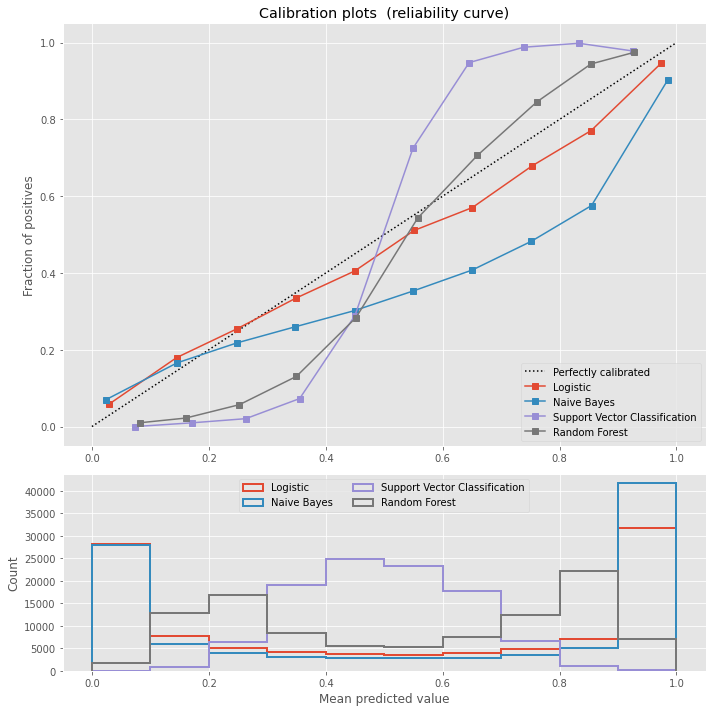

In [18]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=2)

train_samples = 100  # Samples used for training the models

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier()


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

### **Probability Calibration curves**

Logistic:
	Brier: 0.099
	Precision: 0.872
	Recall: 0.851
	F1: 0.862

Naive Bayes:
	Brier: 0.118
	Precision: 0.857
	Recall: 0.876
	F1: 0.867

Naive Bayes + Isotonic:
	Brier: 0.098
	Precision: 0.883
	Recall: 0.836
	F1: 0.859

Naive Bayes + Sigmoid:
	Brier: 0.109
	Precision: 0.861
	Recall: 0.871
	F1: 0.866

Logistic:
	Brier: 0.099
	Precision: 0.872
	Recall: 0.851
	F1: 0.862

SVC:
	Brier: 0.163
	Precision: 0.872
	Recall: 0.852
	F1: 0.862

SVC + Isotonic:
	Brier: 0.100
	Precision: 0.853
	Recall: 0.878
	F1: 0.865

SVC + Sigmoid:
	Brier: 0.099
	Precision: 0.874
	Recall: 0.849
	F1: 0.861



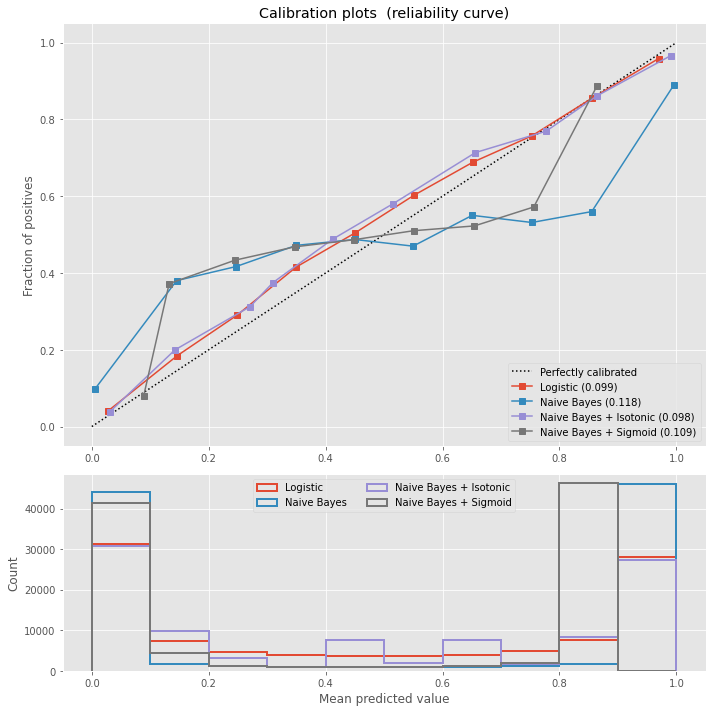

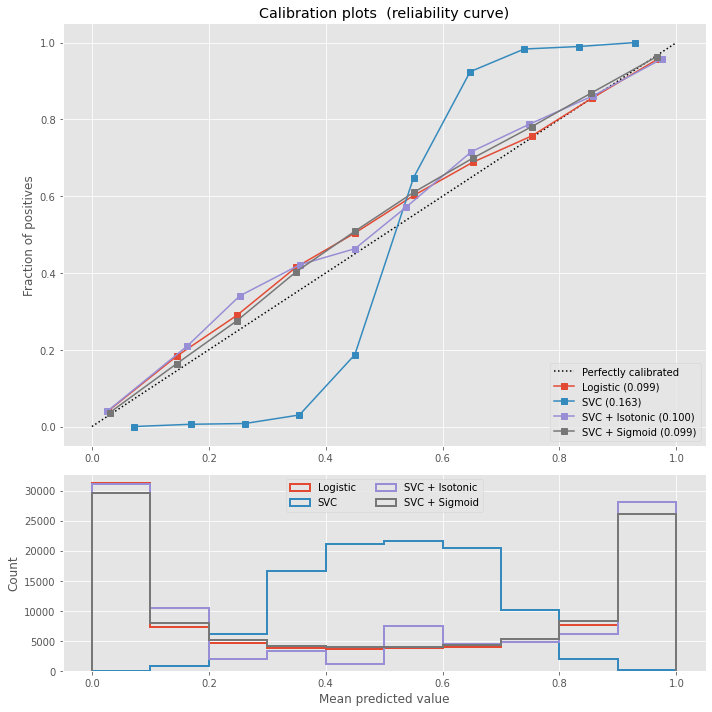

In [19]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split


# Create dataset of classification task with many redundant and few
# informative features
X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=10,
                                    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99,
                                                    random_state=42)


def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1.)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(max_iter=10000), "SVC", 2)

plt.show()

### **Classifier comparison**

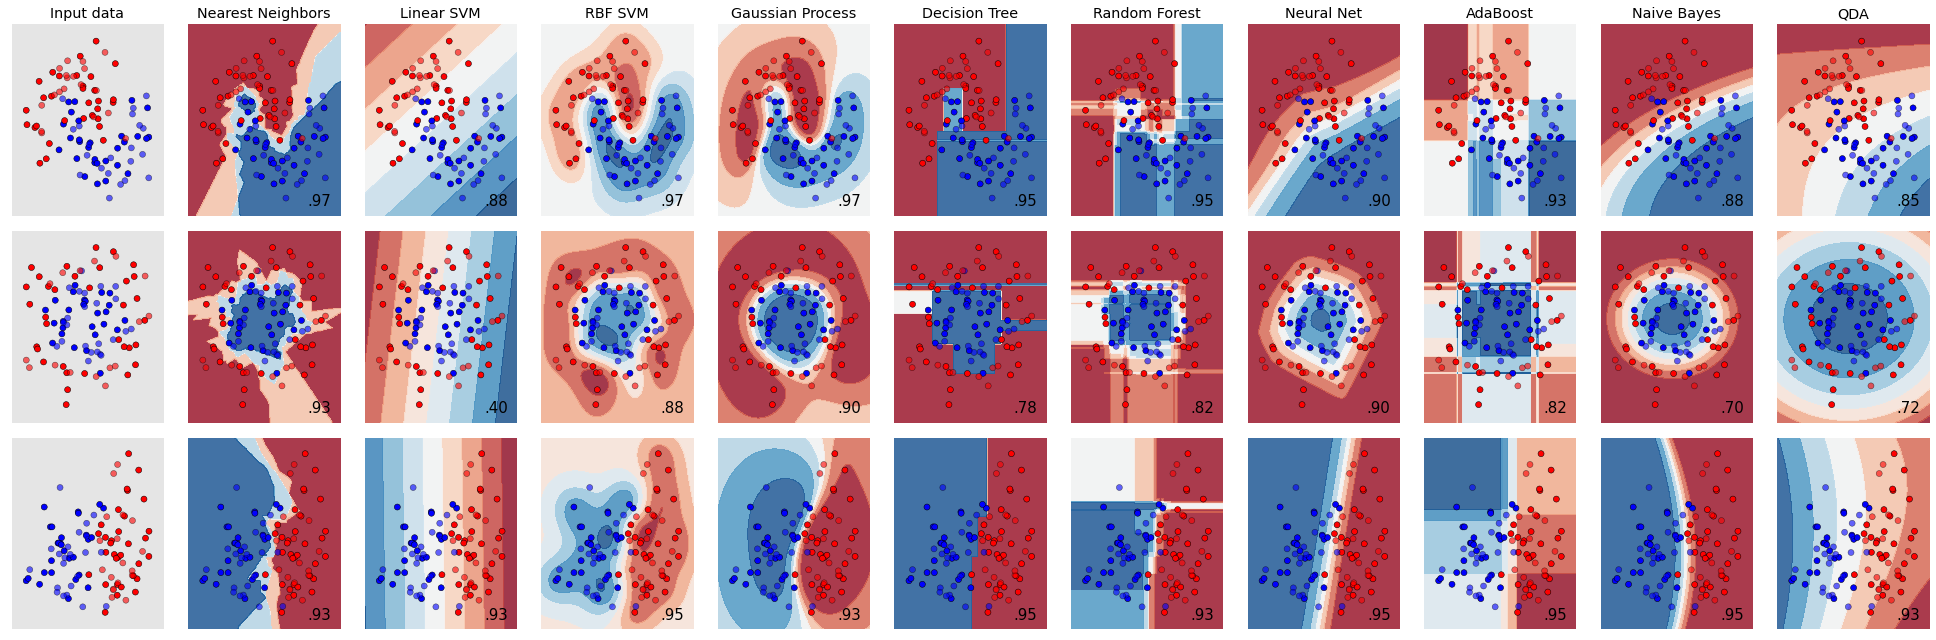

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>